In [1]:
!pip install datasets

In [2]:
from datasets import list_datasets
from datasets import load_dataset
import pandas as pd

In [3]:
all_datasets = list_datasets()
print(f"There area {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are {all_datasets[:10]}")

/tmp/ipykernel_49877/2007646439.py:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


There area 185587 datasets currently available on the Hub
The first 10 are ['amirveyseh/acronym_identification', 'ade-benchmark-corpus/ade_corpus_v2', 'UCLNLP/adversarial_qa', 'Yale-LILY/aeslc', 'nwu-ctext/afrikaans_ner_corpus', 'fancyzhx/ag_news', 'allenai/ai2_arc', 'google/air_dialogue', 'komari6/ajgt_twitter_ar', 'legacy-datasets/allegro_reviews']


In [4]:
emotion = load_dataset("emotion")

In [5]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train_ds = emotion["train"]
train_ds 

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [7]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [8]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [9]:
emotion.set_format(type="pandas")
df = emotion["train"][:]

In [10]:
len(df)

16000

In [11]:
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [12]:
emotion["train"].features["label"]

ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)

In [13]:
emotion["train"].features["label"].int2str(0)

'sadness'

In [14]:
def label_int2str(row):
    return emotion["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)

In [15]:
df

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


In [16]:
import matplotlib.pyplot as plt

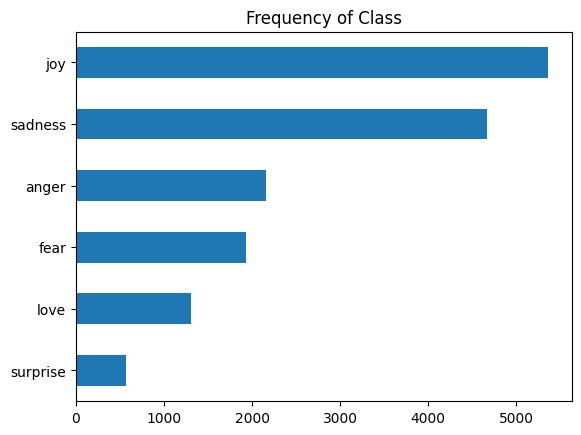

In [17]:
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Class")
plt.show()

In [18]:
df["Words Per Tweet"]=df["text"].str.split().apply(len)

In [19]:
df["Words Per Tweet"]

0         4
1        21
2        10
3        18
4         4
         ..
15995    24
15996    20
15997     6
15998    14
15999    15
Name: Words Per Tweet, Length: 16000, dtype: int64

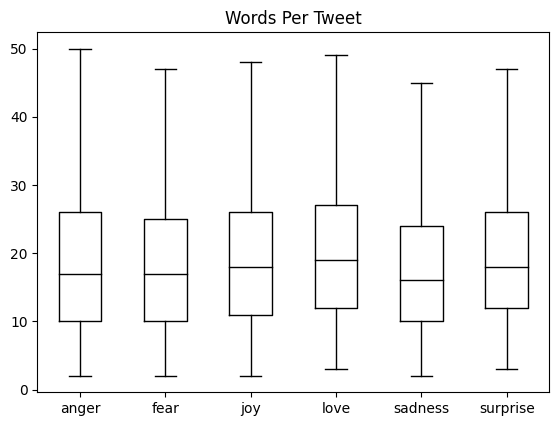

In [20]:
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [21]:
emotion.reset_format()

In [22]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [23]:
set_token = set(tokenized_text)
set_token

{' ',
 '.',
 'L',
 'N',
 'P',
 'T',
 'a',
 'c',
 'e',
 'f',
 'g',
 'i',
 'k',
 'n',
 'o',
 'r',
 's',
 't',
 'x',
 'z'}

In [24]:
sorted_token = sorted(set_token)
sorted_token

[' ',
 '.',
 'L',
 'N',
 'P',
 'T',
 'a',
 'c',
 'e',
 'f',
 'g',
 'i',
 'k',
 'n',
 'o',
 'r',
 's',
 't',
 'x',
 'z']

In [25]:
# for idx, ch in enumerate(sorted_token):
#     token2idx[ch] = idx
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [26]:
token2idx

{' ': 0,
 '.': 1,
 'L': 2,
 'N': 3,
 'P': 4,
 'T': 5,
 'a': 6,
 'c': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'i': 11,
 'k': 12,
 'n': 13,
 'o': 14,
 'r': 15,
 's': 16,
 't': 17,
 'x': 18,
 'z': 19}

In [27]:
input_ids=[]
for token in tokenized_text:
    input_ids.append(token2idx[token])
    
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [28]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [29]:
categorival_df = pd.DataFrame({"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
categorival_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [30]:
pd.get_dummies(categorival_df["Name"])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


In [31]:
import torch
import torch.nn.functional as F


In [32]:
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [33]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [34]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [35]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [36]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [37]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [38]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [39]:
print(tokenize(emotion["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [40]:
emotion_encode = emotion.map(tokenize, batched=True, batch_size=None)

In [41]:
print(emotion_encode["test"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [42]:
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [43]:
text = "this is a pen"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")
print(inputs)
print(inputs.items())

Input tensor shape: torch.Size([1, 6])
{'input_ids': tensor([[ 101, 2023, 2003, 1037, 7279,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}
dict_items([('input_ids', tensor([[ 101, 2023, 2003, 1037, 7279,  102]])), ('attention_mask', tensor([[1, 1, 1, 1, 1, 1]]))])


In [44]:
inputs={k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    outputs=model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1518, -0.0989,  0.0727,  ..., -0.1131,  0.1501,  0.4252],
         [-0.2437, -0.1121, -0.0123,  ..., -0.3360,  0.5245,  0.2296],
         [-0.2118, -0.1403,  0.1992,  ..., -0.1057,  0.1346,  0.7238],
         [-0.1595,  0.1440,  0.1631,  ..., -0.1523, -0.0130,  0.6814],
         [ 0.4231, -0.1841, -0.1753,  ...,  0.0920,  0.1916, -0.0077],
         [ 0.9091,  0.2021, -0.4842,  ...,  0.0796, -0.6812, -0.2442]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [45]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [46]:
print(outputs.last_hidden_state[:,0])

tensor([[-1.5177e-01, -9.8937e-02,  7.2729e-02, -1.5466e-01, -6.6651e-02,
         -1.1186e-01,  7.3098e-02,  2.8629e-01, -1.4848e-01, -2.5586e-01,
         -4.9930e-02, -6.0142e-02, -7.2217e-02,  1.5626e-01,  8.9058e-02,
          7.2140e-02, -1.1504e-01,  1.7087e-01,  1.9846e-01, -8.5120e-02,
         -9.9004e-02, -1.5912e-01, -6.8734e-02, -2.3324e-01,  1.2647e-01,
          5.9998e-04, -6.3197e-04, -1.3481e-01,  5.4374e-02,  5.5455e-02,
         -3.0597e-03,  7.9388e-02, -7.2973e-02, -4.0065e-02,  7.3409e-02,
         -1.0037e-01,  6.3714e-02, -1.7649e-02,  5.3052e-03, -6.3412e-02,
         -7.4271e-02, -2.8493e-02,  2.3214e-01, -5.7911e-02, -7.0728e-02,
         -1.3951e-01, -1.9123e+00,  7.8922e-02, -1.1143e-01, -1.5208e-01,
         -3.4980e-02,  2.6517e-02,  1.3418e-01,  3.3213e-01,  1.8552e-01,
          2.2670e-01, -2.3862e-01,  3.6337e-01, -7.1936e-02, -5.1201e-02,
          1.6661e-01,  5.5676e-03, -4.1907e-02,  1.6180e-01, -1.5686e-02,
          2.0627e-01,  1.3818e-02,  8.

In [47]:
def extract_hidden_states(batch):
    inputs={k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [48]:
emotion_encode.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [49]:
emotion_hidden = emotion_encode.map(extract_hidden_states, batched=True)

In [50]:
emotion_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [51]:
emotion_hidden["train"]

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
    num_rows: 16000
})

In [52]:
# 最初の行の 'hidden_state' を取得
first_hidden_state = emotion_hidden["train"]['hidden_state'].size()

# 'hidden_state' のタイプを表示
print(first_hidden_state)

torch.Size([16000, 768])


In [53]:
import numpy as np
x_train = np.array(emotion_hidden["train"]["hidden_state"])
x_valid = np.array(emotion_hidden["validation"]["hidden_state"])
y_train = np.array(emotion_hidden["train"]["label"])
y_valid = np.array(emotion_hidden["validation"]["label"])

2024-07-30 22:53:54.425416: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-30 22:53:54.549230: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-30 22:53:54.574880: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-30 22:53:55.006523: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

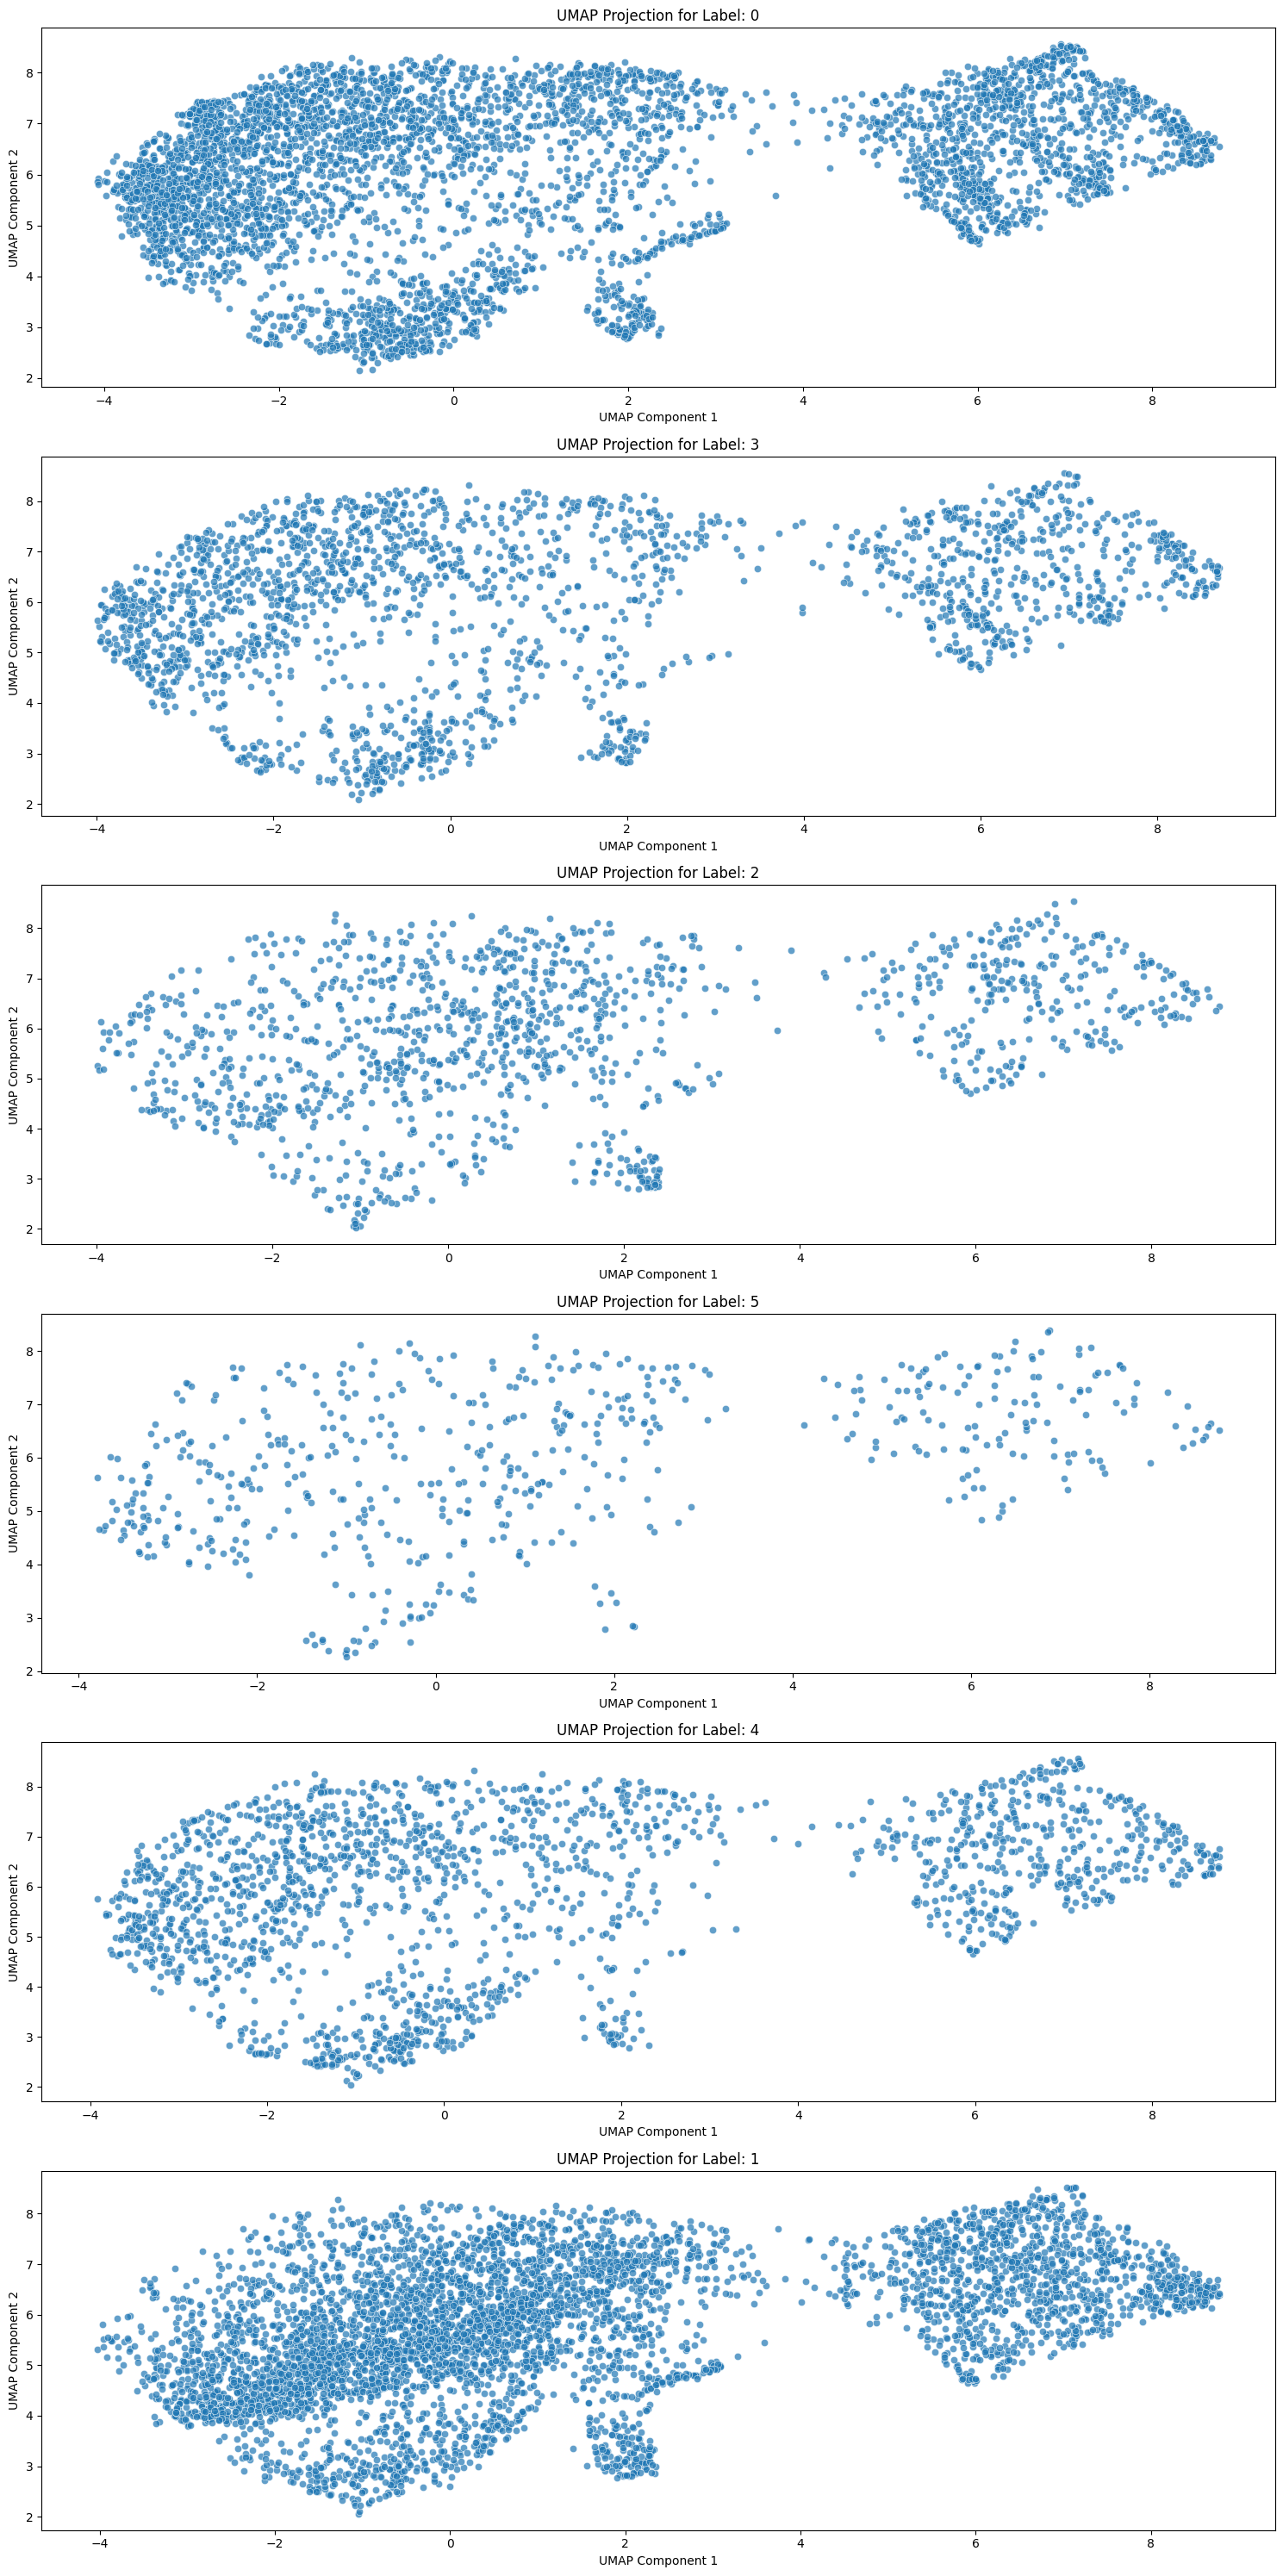

In [54]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# データの準備
x_train = np.array(emotion_hidden["train"]["hidden_state"])
y_train = np.array(emotion_hidden["train"]["label"])

# UMAPによる次元削減
umap_model = umap.UMAP(n_components=2, metric='cosine')
x_train_umap = umap_model.fit_transform(x_train)

# データフレームの作成
df_train = pd.DataFrame(x_train_umap, columns=["UMAP1", "UMAP2"])
df_train["label"] = y_train  # ラベルをデータフレームに追加

# ラベルごとにプロットを分ける
unique_labels = df_train["label"].unique()
n_labels = len(unique_labels)

# プロット
plt.figure(figsize=(15, 5 * n_labels))

for i, label in enumerate(unique_labels):
    plt.subplot(n_labels, 1, i + 1)
    subset = df_train[df_train["label"] == label]
    sns.scatterplot(x="UMAP1", y="UMAP2", data=subset, alpha=0.7)
    plt.title(f'UMAP Projection for Label: {label}')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')

plt.tight_layout()
plt.show()


In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(x_train, y_train)
lr_clf.score(x_valid, y_valid)

0.633

In [57]:
from sklearn.dummy import DummyClassifier

In [58]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)
dummy_clf.score(x_valid, y_valid)

0.352

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

TypeError: 1 must be a sequence

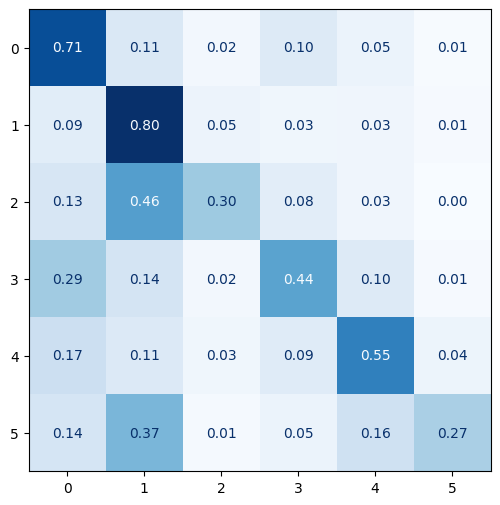

In [60]:
# def plot_confusion_matrix(y_preds, y_true, labels):
#     cm = confusion_matrix(y_true, y_preds, normalize="true")
#     fig, ax = plt.subplots(figsize=(6, 6))
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
#     disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
#     plt.title("Normalized confusion matrix")
#     plt.show()
    
# y_preds = lr_clf.predict(x_valid)
# plot_confusion_matrix(y_preds, y_valid, label)

In [61]:
from transformers import AutoModelForSequenceClassification
num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [62]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [63]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
!pip install accelerate -U

In [ ]:
pip show transformers accelerate

In [ ]:
pip show torch


In [64]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotion_encode["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True, 
                                  log_level="error")

/usr/local/lib/python3.9/site-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [66]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args, 
                  compute_metrics=compute_metrics,
                  train_dataset=emotion_encode["train"],
                  eval_dataset=emotion_encode["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.827000,0.310131,0.906500,0.905698
2,0.251900,0.214771,0.925000,0.924646


In [68]:
preds_output = trainer.predict(emotion_encode["validation"])

In [69]:
preds_output.metrics

{'test_loss': 0.21477077901363373,
 'test_accuracy': 0.925,
 'test_f1': 0.9246462817935741,
 'test_runtime': 1.0247,
 'test_samples_per_second': 1951.833,
 'test_steps_per_second': 31.229}

In [70]:
y_preds = np.argmax(preds_output.predictions, axis=1)

TypeError: 1 must be a sequence

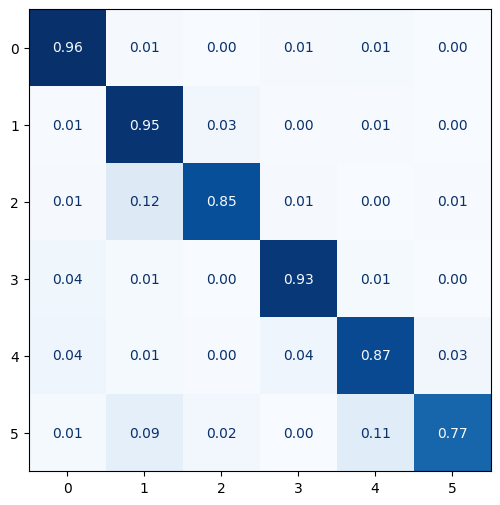

In [72]:
# plot_confusion_matrix(y_preds, y_valid, label)

In [73]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items() 
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device), 
                             reduction="none")

    # Place outputs on CPU for compatibility with other dataset columns   
    return {"loss": loss.cpu().numpy(), 
            "predicted_label": pred_label.cpu().numpy()}

In [75]:
emotion_encode.set_format("torch", 
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotion_encode["validation"] = emotion_encode["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [76]:
emotion_encode.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotion_encode["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

In [77]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1950,i as representative of everything thats wrong ...,surprise,sadness,5.517941
882,i feel badly about reneging on my commitment t...,love,sadness,5.487607
1801,i feel that he was being overshadowed by the s...,love,sadness,5.236100
1963,i called myself pro life and voted for perry w...,joy,sadness,5.230909
1509,i guess this is a memoir so it feels like that...,joy,fear,5.079168
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.945923
1870,i guess i feel betrayed because i admired him ...,joy,sadness,4.864551
1274,i am going to several holiday parties and i ca...,joy,sadness,4.827060
465,i would eventually go in to these stores but i...,joy,fear,4.714844
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.523536


In [79]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
1147,i type i feel bouncy and excited to get out my...,joy,joy,0.019924
632,i feel he is an terrific really worth bet,joy,joy,0.020069
131,i feel like a graph doesnt show the data accur...,joy,joy,0.020261
1873,i feel practically virtuous this month i have ...,joy,joy,0.020294
951,i have to force myself to do it because i am a...,joy,joy,0.020313
69,i have no extra money im worried all of the ti...,sadness,sadness,0.020357
1418,i am a big believer in the phrase that some pe...,joy,joy,0.020400
1638,i feel like if you shop smart you can still ad...,joy,joy,0.020487
378,i feel quite clever,joy,joy,0.020502
1694,i cant even believe that i have reached a half...,joy,joy,0.020625


In [80]:
trainer.push_to_hub(commit_message="Training completed!")

events.out.tfevents.1722347896.6ff8d7504815.49877.0:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/tagaway/distilbert-base-uncased-finetuned-emotion/commit/1507474a249a2b052f5ca7f4d300548755459074', commit_message='Training completed!', commit_description='', oid='1507474a249a2b052f5ca7f4d300548755459074', pr_url=None, pr_revision=None, pr_num=None)

In [82]:
from transformers import pipeline

model_id = "tagaway/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [84]:
tweet = "I saw a movie today and it was really good."
preds = classifier(tweet, return_all_scores=True)

/usr/local/lib/python3.9/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [89]:
preds

[[{'label': 'LABEL_0', 'score': 0.012417934834957123},
  {'label': 'LABEL_1', 'score': 0.9635645747184753},
  {'label': 'LABEL_2', 'score': 0.008877001702785492},
  {'label': 'LABEL_3', 'score': 0.005552976857870817},
  {'label': 'LABEL_4', 'score': 0.004145873710513115},
  {'label': 'LABEL_5', 'score': 0.005441823974251747}]]

['LABEL_0', 'LABEL_1', 'LABEL_2', 'LABEL_3', 'LABEL_4', 'LABEL_5']
[0.012417934834957123, 0.9635645747184753, 0.008877001702785492, 0.005552976857870817, 0.004145873710513115, 0.005441823974251747]


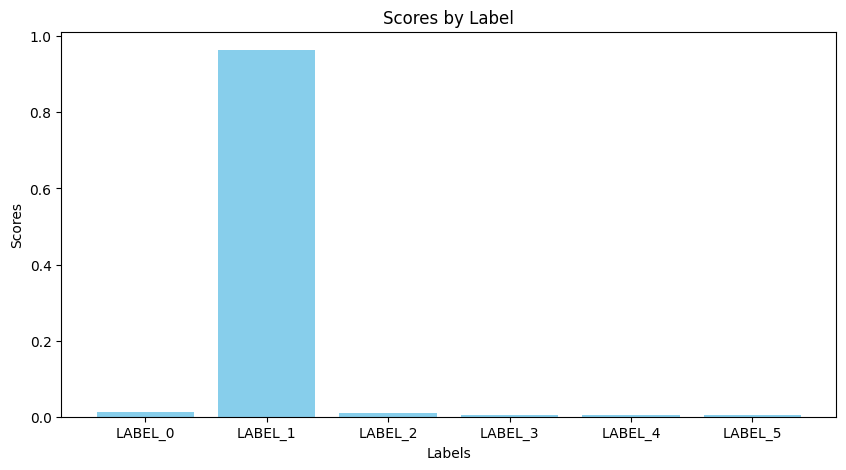

In [93]:
data = preds[0]

# ラベルとスコアの抽出
labels = [item['label'] for item in data]
scores = [item['score'] for item in data]
print(labels)
print(scores)

# 棒グラフの作成
plt.figure(figsize=(10, 5))
plt.bar(labels, scores, color='skyblue')

# グラフのタイトルとラベル
plt.title('Scores by Label')
plt.xlabel('Labels')
plt.ylabel('Scores')

# グラフの表示
plt.show()